






























































































































# Importing packages 

In [58]:
# Data wrangling 
import pandas as pd 

# Array math
import numpy as np 

# Ploting 
import seaborn as sns
import matplotlib.pyplot as plt

# List iteration tracking
from tqdm import tqdm

# Importing the custom written class 
from DecisionTree import Node 

# Importing the custom regression tree 
from RegressionDecisionTree import NodeRegression

# Importing the scikit-learn tree implementation
from sklearn.tree import DecisionTreeClassifier, export_text , DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix

# Inspecting functions
import inspect

# Time tracking
import time

# Motivating example

Lets load some data from the famous titanic dataset.

In [59]:
# Loading data
d = pd.read_csv('heart.csv')

In [60]:
d.head(-10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [61]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
d.shape

(303, 14)

In [63]:
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
d.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = d.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


Lets say we want to create a classifier whether a person have heart disease or not using two variables: trestbps and oldpeak. We want to create a simple decision tree to accomplish this task. 

In [66]:
dd = d[['target', 'oldpeak', 'thalach']].copy()

# Droping missing entries
dd.dropna(inplace=True)

In [67]:
print(f"Number of observations: {dd.shape[0]}")

Number of observations: 303


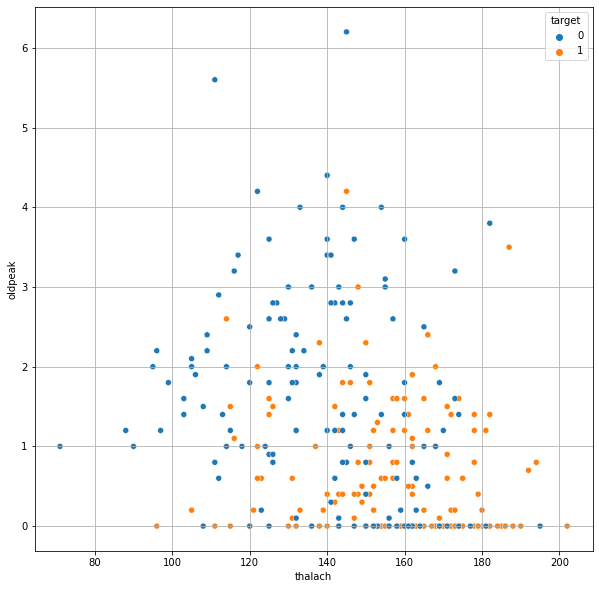

In [68]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y='oldpeak', x='thalach', data=dd, hue='target')
plt.grid()
plt.show()

Every decision tree creation starts with the selection of what variable and what value we should choose to split? 

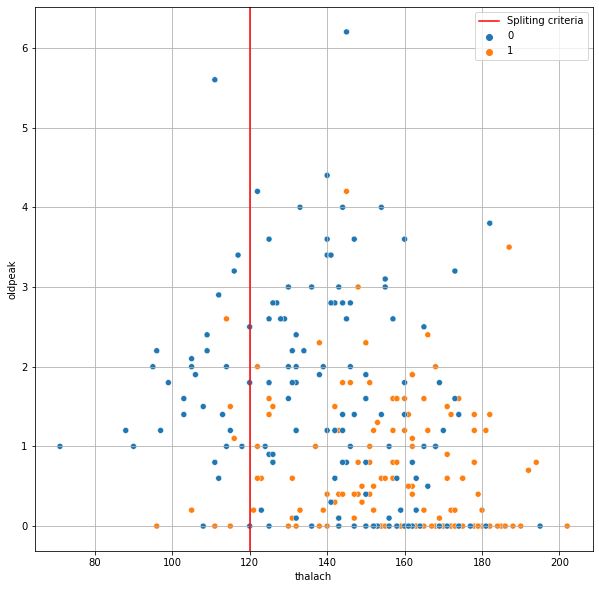

In [69]:
# Define the split value 
thalach_split = 120

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='oldpeak', x='thalach', data=dd, hue='target')
plt.grid()

# Adding the vertical line
plt.axvline(thalach_split, label='Spliting criteria', color='red')
plt.legend()
plt.show()

In [70]:
# Getting the left and right datasets
left = dd[dd['thalach']<=thalach_split]
right = dd[dd['thalach']>thalach_split]

We made a decision to split the data into two parts based on the visual ques from the scatterplot. Some statistics:

In [71]:
print(f"Observations to the left of criteria: {left.shape[0]}")
print(f"Observations to the right of criteria: {right.shape[0]}")

Observations to the left of criteria: 37
Observations to the right of criteria: 266


In [72]:
left.groupby('target', as_index=False).size()

,target,size
0,0,30
1,1,7


In [73]:
right.groupby('target', as_index=False).size()

,target,size
0,0,108
1,1,158


There are observations from both of the classes in the nodes. Thus, each of the nodes are are **impure**. But how impure? To measure impurity we use the **GINI** impurity coefficient. 

# GINI impurity definition 

The GINI impurity index is the default spliting criteria when building decision trees. 

The formal definition for GINI impurity is as follows: 
    
*Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.*

The definition is not very intuitive so lets bring some clarity. 

Suppose we have two classes in the dataset:

$$k_{1}, k_{2}$$. 

Each of the classes have $n_{1}$ and $n_{2}$ observations.

The probability of observing something from one of the $k$ classes is: 

$$p(i) = P(x_{i} \in k_{i}) = \dfrac{n_{i}}{n_{1} + n_{2}},  i \in \{1, 2\}$$

The GINI impurity of such a system is calculated with the following formula:
    
$$G = 1 - \Sigma_{i=1}^{2}p(i)^{2}$$

The function for calculating the impurity is in the **Node** class:

In [74]:
print(inspect.getsource(Node.GINI_impurity))

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini



In [75]:
# Simulating some data
n = 1000

shares_y1 = [
    0, 
    0.1,
    0.2,
    0.3,
    0.4,
    0.5, 
    0.6,
    0.7,
    0.8,
    0.9,
    1
] 

y1_counts = [x * n for x in shares_y1]
y2_counts = [n - x for x in y1_counts]

y = list(zip(y1_counts, y2_counts))

In [76]:
y

[(0, 1000),
 (100.0, 900.0),
 (200.0, 800.0),
 (300.0, 700.0),
 (400.0, 600.0),
 (500.0, 500.0),
 (600.0, 400.0),
 (700.0, 300.0),
 (800.0, 200.0),
 (900.0, 100.0),
 (1000, 0)]

In [77]:
# Getting the GINI impurities for such data
ginis = [Node.GINI_impurity(x[0], x[1]) for x in y]

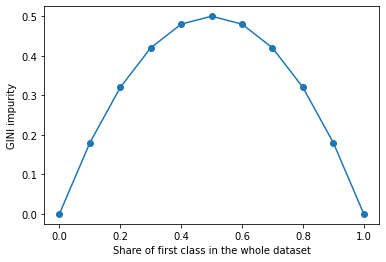

In [78]:
plt.plot(shares_y1, ginis, '-o')
plt.xlabel("Share of first class in the whole dataset")
plt.ylabel("GINI impurity")
plt.show()

The above graph shows a very important relationship. The upper bound of the GINI impurity index is 0.5. It occurs when there is an equal number of observations of each class in the dataset. This is the **worst** case in terms of GINI impurity.

At the edges of graph, we get that impurity is 0. This occurs when there is only one class in the data. This is the **best** situation. 

# GINI impurity of a split 

Going back to the example with the heart dataset, we have two datasets resulting from the chosen split. Each of the datasets have different GINI impurity indexes. 

In [79]:
left_counts = left.groupby("target").size().values.tolist()
right_counts = right.groupby("target").size().values.tolist()

gini_left = Node.GINI_impurity(left_counts[0], left_counts[1])
gini_right = Node.GINI_impurity(right_counts[0], right_counts[1])

In [80]:
print(f"Gini impurity of the left node: {gini_left}")
print(f"Gini impurity of the right node: {gini_right}")

Gini impurity of the left node: 0.3067932797662527
Gini impurity of the right node: 0.4823336536830799


The final GINI impurity index is calculated using the weighted average based on the observation sizes in each of the datasets.

In [81]:
w1 = left.shape[0]/ (left.shape[0] + right.shape[0]) 
w2 = right.shape[0] / (left.shape[0] + right.shape[0]) 

In [82]:
gini_final = w1 * gini_left + w2 * gini_right

In [83]:
print(f"Final gini impurity: {gini_final}")

Final gini impurity: 0.46089803046551353


# GINI gain

The last metric used in deciding where to split the data is the GINI gain metric. Its calculated by the difference of non splited GINI of the dataset and the GINI of the selected split. 

$$GINI gain = \Delta Gini = Gini_{parent} - (Gini_{left} \dfrac{n_{left}}{n_{right} + n_{left}} + Gini_{right} \dfrac{n_{right}}{n_{right} + n_{left}} )$$

In [84]:
def GINI_impurity_df(df:pd.DataFrame, target):
    """
    Function to calculate the resulting GINI impurity of a split
    """
    # Getting the counts and ginis
    counts = df.groupby(target).size().values.tolist()

    gini = Node.GINI_impurity(counts[0], counts[1])
    
    return gini

In [85]:
gini_orig = GINI_impurity_df(dd, 'target')

In [86]:
print(f"Gini non-splited: {gini_orig}")
print(f"Gini with the proposed split: {gini_final}")
print(f"Gini gain: {gini_orig - gini_final}")

Gini non-splited: 0.4960298009999019
Gini with the proposed split: 0.46089803046551353
Gini gain: 0.035131770534388373


At each split decision, we chose that split that has the highest GINI gain. If the GINI gain is non positive, we do not perform the split.

# Spliting on numeric variables 


When deciding where to split a numeric feature, we first sort all the values, get the means between neighbouring values and calculate the GINI gains with each of the means.

The full code to get the best split:

In [87]:
print(inspect.getsource(Node.ma))

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window



In [88]:
print(inspect.getsource(Node.best_split))

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Ge

# Growing the full tree

In [89]:
# Dropping missing values
dtree = d[['target', 'oldpeak', 'thalach']].dropna().copy()

# Defining the X and Y matrices
Y = dtree['target'].values
X = dtree[['oldpeak', 'thalach']]

# Saving the feature list 
features = list(X.columns)

In [90]:
# Setting the available hyper parameters of a tree
hp = {
    'max_depth': 3,
    'min_samples_split': 50
}

In [91]:
# Initiating the Node
root = Node(Y, X, **hp)

# Getting teh best split
root.grow_tree()

# Printing the tree information 
root.print_tree()

Root
   | GINI impurity of the node: 0.5
   | Class distribution in the node: {1: 165, 0: 138}
   | Predicted class: 1
|-------- Split rule: thalach <= 147.5
           | GINI impurity of the node: 0.42
           | Class distribution in the node: {1: 38, 0: 89}
           | Predicted class: 0
|---------------- Split rule: oldpeak <= 0.7
                   | GINI impurity of the node: 0.45
                   | Class distribution in the node: {1: 23, 0: 12}
                   | Predicted class: 1
|---------------- Split rule: oldpeak > 0.7
                   | GINI impurity of the node: 0.27
                   | Class distribution in the node: {1: 15, 0: 77}
                   | Predicted class: 0
|------------------------ Split rule: oldpeak <= 1.85
                           | GINI impurity of the node: 0.38
                           | Class distribution in the node: {1: 11, 0: 33}
                           | Predicted class: 0
|------------------------ Split rule: oldpeak > 1.85
  

As it turns out, the best first split is the chol feature at value 300.  

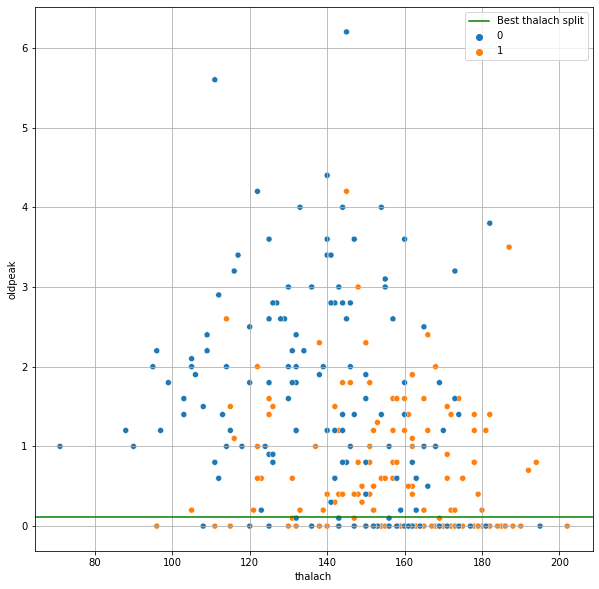

In [92]:
# Define the split value 
thalach_split = 0.1

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='oldpeak', x='thalach', data=dd, hue='target')
plt.grid()

# Adding the split line
plt.axhline(0.11, label='Best thalach split', color='green')
plt.legend()
plt.show()

# Scikit-learn comparison 

Lets see how it compares to the custom tree creation that I have written.

In [93]:
custom_tree_start = time.time()

# Initiating the Node
root = Node(Y, X, **hp)

# Getting teh best split
root.grow_tree()

custom_tree_time = time.time() - custom_tree_start

In [94]:
scikit_tree_start = time.time()

# Using the ML package 
clf = DecisionTreeClassifier(**hp)
clf.fit(X, Y)

scikit_tree_time = time.time() - scikit_tree_start

In [95]:
print(f"Custom tree growing time: {custom_tree_time}s")
print(f"Scikit tree growing time: {scikit_tree_time}s")

Custom tree growing time: 0.4280529022216797s
Scikit tree growing time: 0.0041310787200927734s


As can be expected, the highly optimized scikit-learn solution works faster.

Both methods have a visualization: 

In [96]:
root.print_tree()

Root
   | GINI impurity of the node: 0.5
   | Class distribution in the node: {1: 165, 0: 138}
   | Predicted class: 1
|-------- Split rule: thalach <= 147.5
           | GINI impurity of the node: 0.42
           | Class distribution in the node: {1: 38, 0: 89}
           | Predicted class: 0
|---------------- Split rule: oldpeak <= 0.7
                   | GINI impurity of the node: 0.45
                   | Class distribution in the node: {1: 23, 0: 12}
                   | Predicted class: 1
|---------------- Split rule: oldpeak > 0.7
                   | GINI impurity of the node: 0.27
                   | Class distribution in the node: {1: 15, 0: 77}
                   | Predicted class: 0
|------------------------ Split rule: oldpeak <= 1.85
                           | GINI impurity of the node: 0.38
                           | Class distribution in the node: {1: 11, 0: 33}
                           | Predicted class: 0
|------------------------ Split rule: oldpeak > 1.85
  

In [97]:
print(export_text(clf, feature_names=['oldpeak', 'thalach']))

|--- thalach <= 147.50
|   |--- oldpeak <= 0.70
|   |   |--- class: 1
|   |--- oldpeak >  0.70
|   |   |--- oldpeak <= 1.85
|   |   |   |--- class: 0
|   |   |--- oldpeak >  1.85
|   |   |   |--- class: 0
|--- thalach >  147.50
|   |--- oldpeak <= 2.45
|   |   |--- thalach <= 171.50
|   |   |   |--- class: 1
|   |   |--- thalach >  171.50
|   |   |   |--- class: 1
|   |--- oldpeak >  2.45
|   |   |--- class: 0



# Predictions

In [98]:
# Result frame
results = X.copy()

# Predictions
results['scikit_learn'] = clf.predict(X[features])
results['custom_yhat'] = root.predict(X[features])

# Asserting that every prediction is the same 
np.all(results['scikit_learn'] == results['custom_yhat'])

True

In [99]:
accuracy_score(results['custom_yhat'], results['scikit_learn'])

1.0

All the predictions are the same. 

# Regression trees 

If the response variable $Y$ is not binary but continuous, the spliting criteria of Gini impurity looses its sense. We then use what are called regression decision trees. 

The main difference between the classification decision tree is that each node saves the mean of the $Y$ variable in itself and the spliting logic aims to minimize the sum of squared **residuals** in each node. 

The residuals are calculated by the formula:

$$r_{i} = y_{i} - \widehat{y}$$ 

Where $y_{i}$ - is the true i-th observation in the node and $\widehat{y}$ is the average of the response variables in the node.

# The data 

We will try to create a decision tree where the dependent variable $Y$ is the miles per gallon that a car can go and the explanatory variables $X$ are horsepower, accelaration and the weight of the car.  

## Reading data 

In [100]:
d = pd.read_csv("heart.csv")

# Subsetting
d = d[d['thalach']!='?']

# Constructing the X and Y matrices
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for ft in features:
    d[ft] = pd.to_numeric(d[ft])

X = d[features]
Y = d['target'].values.tolist()

### Ploting relationships

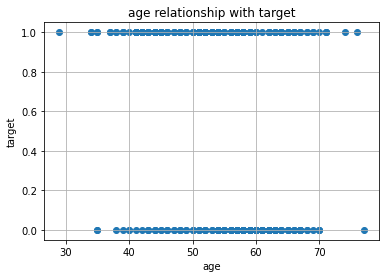

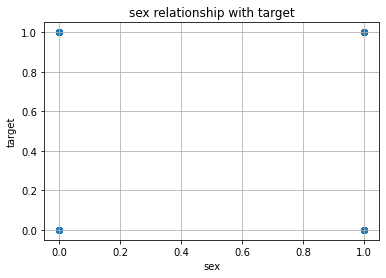

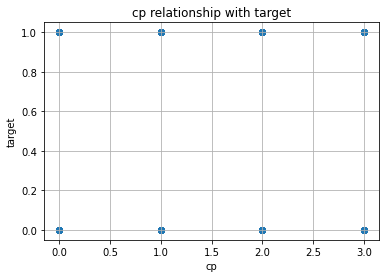

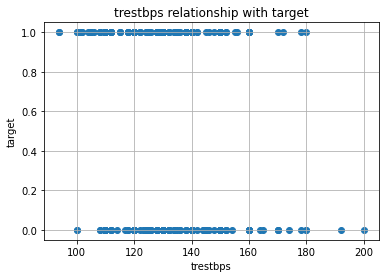

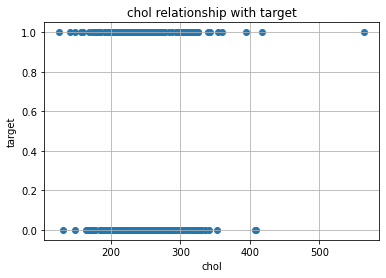

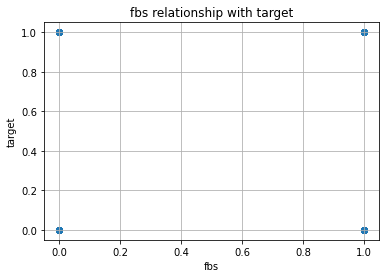

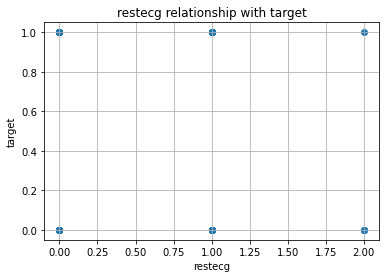

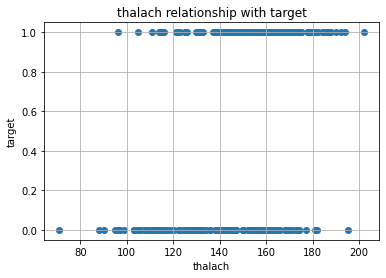

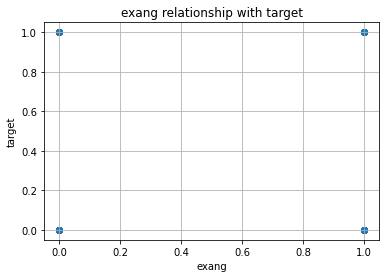

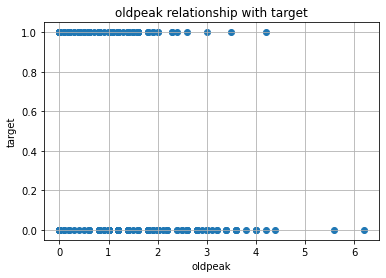

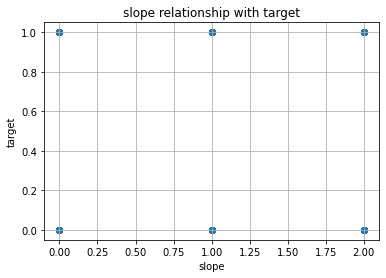

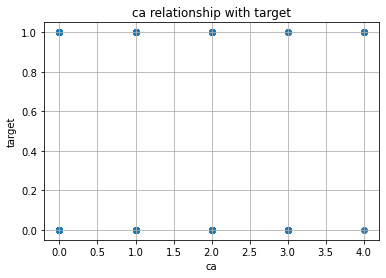

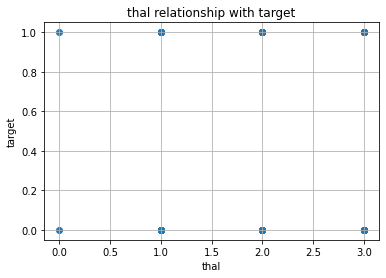

In [101]:
for feature in features:
    plt.scatter(X[feature], Y)
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(f"{feature} relationship with target")
    plt.grid()
    plt.show()

## The spliting criterion 

The main difference between a classification tree and a regression tree is the spliting criterion. Each node has the y mean saved and we can get the residuals by subtracting that mean from all the y values that fall into that node.

Then we search for the feature and the feature value which minimizes the **mean squared error (mse)** statistic:

$$mse = \dfrac{1}{n} \Sigma_{i=1}^{n} \left( y_{i} - \overline{y} \right) ^ {2}$$

# Implementation

In [102]:
custom_tree_start = time.time()

# Initiating the Node
root = NodeRegression(Y, X, **hp)

# Getting teh best split
root.grow_tree()

custom_tree_time = time.time() - custom_tree_start

/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/numpy/core/_method

In [103]:
scikit_tree_start = time.time()

# Using the ML package 
clf = DecisionTreeRegressor(**hp)
clf.fit(X, Y)

scikit_tree_time = time.time() - scikit_tree_start

In [104]:
print(f"Custom tree growing time: {custom_tree_time}s")
print(f"Scikit tree growing time: {scikit_tree_time}s")

Custom tree growing time: 1.853348970413208s
Scikit tree growing time: 0.0023207664489746094s


In [105]:
root.print_tree()

Root
   | MSE of the node: 0.25
   | Count of observations in node: 303
   | Prediction of node: 0.545
|-------- Split rule: cp <= 0.5
           | MSE of the node: 0.2
           | Count of observations in node: 143
           | Prediction of node: 0.273
|---------------- Split rule: ca <= 0.5
                   | MSE of the node: 0.25
                   | Count of observations in node: 65
                   | Prediction of node: 0.523
|------------------------ Split rule: thal <= 2.5
                           | MSE of the node: 0.18
                           | Count of observations in node: 38
                           | Prediction of node: 0.763
|------------------------ Split rule: thal > 2.5
                           | MSE of the node: 0.15
                           | Count of observations in node: 27
                           | Prediction of node: 0.185
|---------------- Split rule: ca > 0.5
                   | MSE of the node: 0.06
                   | Count of observatio

In [106]:
print(export_text(clf, feature_names=features))

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- value: [0.76]
|   |   |--- thal >  2.50
|   |   |   |--- value: [0.19]
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- value: [0.40]
|   |   |--- trestbps >  109.00
|   |   |   |--- value: [0.04]
|--- cp >  0.50
|   |--- thal <= 2.50
|   |   |--- age <= 55.50
|   |   |   |--- value: [0.96]
|   |   |--- age >  55.50
|   |   |   |--- value: [0.71]
|   |--- thal >  2.50
|   |   |--- value: [0.54]



In [107]:
target = d['target']
d1 = d.copy()
d1 = d1.drop('target', axis =1)

In [108]:
X = d1

In [109]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
y = target

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (242, 13)
Testing split input-  (61, 13)


In [112]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [113]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



Text(0.5, 1.0, 'Accuracy Score: 81.9672131147541')

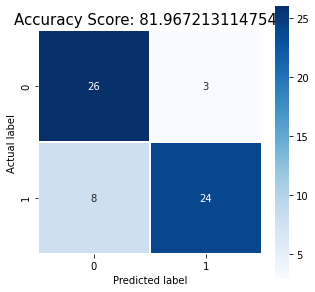

In [114]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)